llama_model_loader: loaded meta data with 40 key-value pairs and 197 tensors from /home/hessel/code/lm-studio/bartowski/Phi-3.5-mini-instruct-GGUF/Phi-3.5-mini-instruct-Q4_K_S.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = phi3
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Phi 3.5 Mini Instruct
llama_model_loader: - kv   3:                           general.finetune str              = instruct
llama_model_loader: - kv   4:                           general.basename str              = Phi-3.5
llama_model_loader: - kv   5:                         general.size_label str              = mini
llama_model_loader: - kv   6:                            general.license str           

{
  "fraud_risk": "Low",
  "reasons": "The amount is not excessive for a single electronic purchase and the locations match within reasonable travel distance.",
  "recommended_actions": "No immediate action required. However, continue to monitor future transactions of John Doe."
}
{'fraud_risk': 'Low',
 'reasons': 'The amount is not excessive for a single electronic purchase and '
            'the locations match within reasonable travel distance.',
 'recommended_actions': 'No immediate action required. However, continue to '
                        'monitor future transactions of John Doe.'}


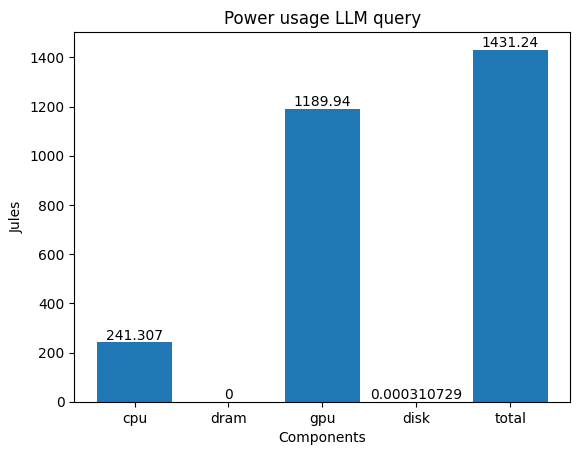

{'cpu': array([241.306999]),
 'dram': 0.0,
 'gpu': 1189.9352091659741,
 'disk': 0.00031072875}

In [2]:
from langchain_community.llms import LlamaCpp
from langchain_core.prompts import PromptTemplate
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.chains import LLMChain
from datetime import datetime, date
from decimal import Decimal
import sys
import json
import pprint
sys.path.append("../")
from models.transaction import TransactionModel
from tools.EnergyMeter.energy_meter import EnergyMeter
from classifiers.fraud_detect import detect_fraud

llm = LlamaCpp(
        model_path="/home/hessel/code/lm-studio/bartowski/Phi-3.5-mini-instruct-GGUF/Phi-3.5-mini-instruct-Q4_K_S.gguf",
        temperature=0.1,
        max_tokens=2000,
        n_ctx=2048,
        n_batch=512,
        n_gpu_layers=-1,
        f16_kv=True,
        verbose=True,
        use_mlock=False,
        use_mmap=True
    )

meter = EnergyMeter(disk_avg_speed=1600*1e6, 
                            disk_active_power=6, 
                            disk_idle_power=1.42, 
                            label="Power usage LLM query", include_idle=False)
meter.begin()

# Create a test transaction
test_transaction = TransactionModel(
    trans_date_trans_time=datetime.now(),
    cc_num="4532015112830366",
    merchant="Tech Gadgets Online",
    category="Electronics",
    amt=Decimal("1999.99"),
    first="John",
    last="Doe",
    gender="M",
    street="123 Main St",
    city="New York",
    state="NY",
    zip="10001",
    lat=40.7128,
    long=-74.0060,
    city_pop=8336817,
    job="Software Engineer",
    dob=date(1985, 5, 15),
    trans_num="TR12345678",
    unix_time=int(datetime.now().timestamp()),
    merch_lat=34.0522,
    merch_long=-118.2437,
    is_fraud=False,
)



# Run the fraud detection
result = detect_fraud(test_transaction, llm)
print(json.dumps(result, indent=2))
pprint.pprint(result)

meter.end()
meter.plot_total_jules_per_component()
meter.get_total_jules_per_component()